# Indonesian Food Image Classifier

Notebook ini akan membantu Anda melakukan klasifikasi gambar makanan Indonesia menggunakan model RegNet yang telah dilatih. Model dapat mengklasifikasikan 5 jenis makanan:
- Bakso
- Gado-gado
- Nasi Goreng
- Rendang
- Soto Ayam

## 1. Import Libraries dan Setup

In [1]:
import torch
import torch.nn as nn
from torchvision.models import regnet_x_400mf, RegNet_X_400MF_Weights
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import display
import ipywidgets as widgets

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Define image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

Using device: cuda


## 2. Load Model

In [2]:
# Define class labels
idx_to_label = {
    0: 'bakso',
    1: 'gado_gado',
    2: 'nasi_goreng',
    3: 'rendang',
    4: 'soto_ayam'
}

# Create model
def create_regnet_model(num_classes):
    weights = RegNet_X_400MF_Weights.IMAGENET1K_V1
    model = regnet_x_400mf(weights=weights)
    
    # Replace the final classification layer
    in_features = model.fc.in_features
    model.fc = nn.Sequential(
        nn.Linear(in_features, num_classes),
        nn.Softmax(dim=1)
    )
    return model

# Initialize model
model = create_regnet_model(num_classes=5)

# Load trained weights
model.load_state_dict(torch.load('best_regnet_model.pth'))
model = model.to(device)
model.eval()

print("Model loaded successfully!")

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26008\3266965509.py:27: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_regnet_model.pth'))

Model loaded successfully!


## 3. Fungsi Prediksi

In [3]:
def predict_image(image_path):
    # Load and preprocess image
    image = Image.open(image_path).convert('RGB')
    image_tensor = transform(image).unsqueeze(0).to(device)
    
    # Make prediction
    with torch.no_grad():
        outputs = model(image_tensor)
        probabilities = outputs[0]
        _, predicted = torch.max(outputs, 1)
    
    # Get prediction and probability
    pred_label = idx_to_label[predicted.item()]
    pred_prob = probabilities[predicted.item()].item()
    
    # Display image and prediction
    plt.figure(figsize=(8, 6))
    plt.imshow(image)
    plt.axis('off')
    plt.title(f'Prediction: {pred_label}\nConfidence: {pred_prob:.2%}')
    plt.show()
    
    # Print all probabilities
    print("\nProbabilitas untuk setiap kelas:")
    for idx, prob in enumerate(probabilities):
        print(f"{idx_to_label[idx]}: {prob.item():.2%}")
        
    return pred_label, pred_prob

## 4. Contoh Penggunaan

Mencoba memprediksi gambar: test2.jpg


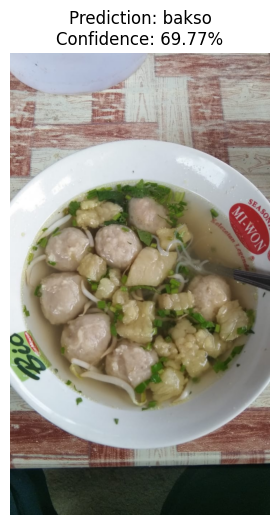


Probabilitas untuk setiap kelas:
bakso: 69.77%
gado_gado: 3.53%
nasi_goreng: 12.49%
rendang: 0.42%
soto_ayam: 13.79%

Hasil prediksi akhir:
Label: bakso
Confidence: 69.77%


In [9]:
# Masukkan path gambar yang ingin diprediksi
image_path = 'test2.jpg'  # Ganti dengan path gambar Anda

# Lakukan prediksi
try:
    print(f"Mencoba memprediksi gambar: {image_path}")
    pred_label, pred_prob = predict_image(image_path)
    print(f"\nHasil prediksi akhir:")
    print(f"Label: {pred_label}")
    print(f"Confidence: {pred_prob:.2%}")
except Exception as e:
    print(f"Error: {str(e)}")
    print("Pastikan path gambar sudah benar dan file gambar ada")